In [1]:
# ====== 0) SETUP (RUN THIS FIRST) ======
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Colab'da dosyalar bazen /content içine yüklenir, kontrol edelim
import os

# Dosya isimlerini burada tek yerde tanımlıyoruz (Dosyalar panelindeki isimle AYNI olmalı)
RAW_FILE = "raw (4) (1).xlsx"
CLEAN_FILE = "clean 4.xlsx"

# Dosyalar var mı kontrol
print("Current folder:", os.getcwd())
print("Files in folder:", os.listdir("."))

assert RAW_FILE in os.listdir("."), f"{RAW_FILE} bulunamadı. Dosyalar panelinden yükle."
assert CLEAN_FILE in os.listdir("."), f"{CLEAN_FILE} bulunamadı. Dosyalar panelinden yükle."

# Excel'leri oku
raw_df = pd.read_excel(RAW_FILE)
clean_df = pd.read_excel(CLEAN_FILE)

print("RAW shape:", raw_df.shape)
print("CLEAN shape:", clean_df.shape)

clean_df.head()


Current folder: /content
Files in folder: ['.config', 'raw (4) (1).xlsx', 'clean 4.xlsx', 'sample_data']
RAW shape: (891, 12)
CLEAN shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Stage 1 – Problem Definition and Data Understanding

In this project, the Titanic dataset is used to predict whether a passenger survived or not.
The target variable of the problem is **Survived**, which is a binary classification problem.

The dataset contains demographic and travel-related information such as age, gender, passenger class, fare, and embarkation port.
Both raw and cleaned versions of the dataset are analyzed to understand the preprocessing steps and data quality.

The main objective of this project is to build machine learning models that can accurately predict survival outcomes.


In [2]:
# Dataset basic information
print("RAW DATASET INFO")
raw_df.info()

print("\nCLEAN DATASET INFO")
clean_df.info()


RAW DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

CLEAN DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  

In [3]:
# Missing value analysis
clean_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Stage 2 – Data Preprocessing and Exploratory Data Analysis (EDA)

In this stage, the dataset is preprocessed and explored visually to understand the relationships between variables and the target variable.
Missing values, feature distributions, and survival patterns are analyzed through graphical representations.

These exploratory analyses help identify important features and guide the modeling decisions in the next stage.


In [4]:
# Target and features
target = "Survived"

X = clean_df.drop(columns=[target])
y = clean_df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (891, 11)
y shape: (891,)


In [5]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


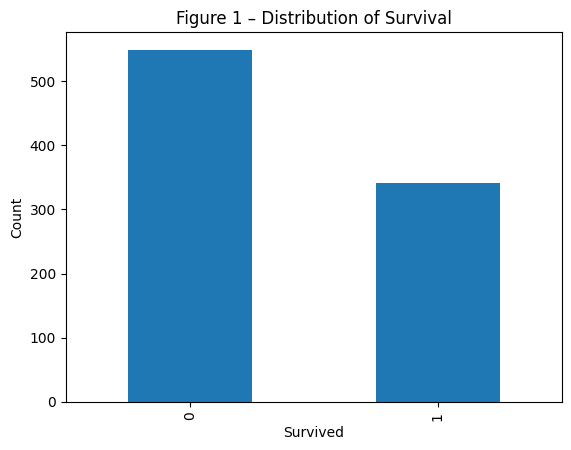

In [6]:
plt.figure()
clean_df["Survived"].value_counts().sort_index().plot(kind="bar")
plt.title("Figure 1 – Distribution of Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


**Figure 1 Interpretation:**  
This figure shows the distribution of the target variable. The dataset is slightly imbalanced, with fewer passengers surviving than not surviving.


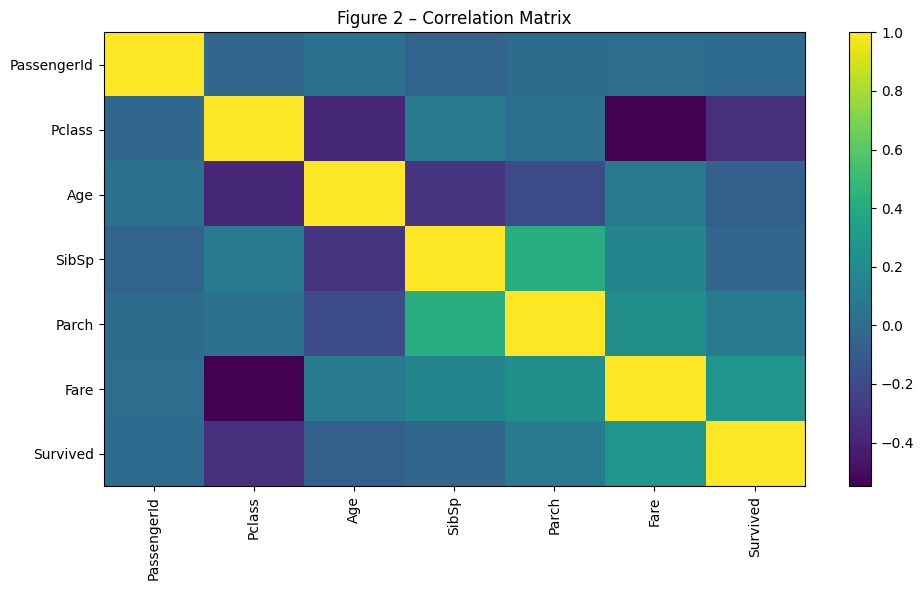

In [7]:
corr = clean_df[numerical_cols + ["Survived"]].corr()

plt.figure(figsize=(10,6))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Figure 2 – Correlation Matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()


**Figure 2 Interpretation:**  
The correlation matrix indicates that features such as Sex, Pclass, and Fare are strongly related to passenger survival.


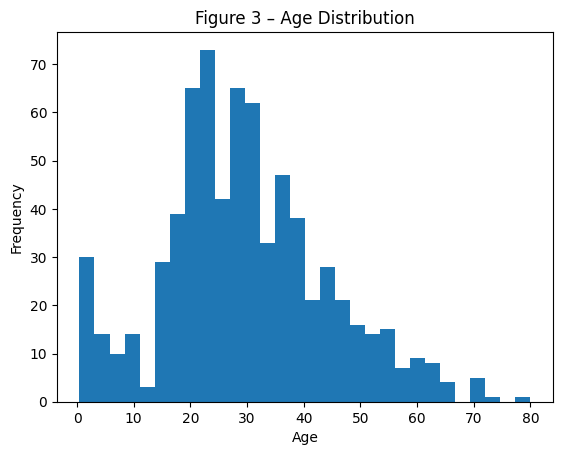

In [8]:
plt.figure()
clean_df["Age"].dropna().plot(kind="hist", bins=30)
plt.title("Figure 3 – Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**Figure 3 Interpretation:**  
The age distribution shows that most passengers were between 20 and 40 years old, with some missing values that were handled during preprocessing.


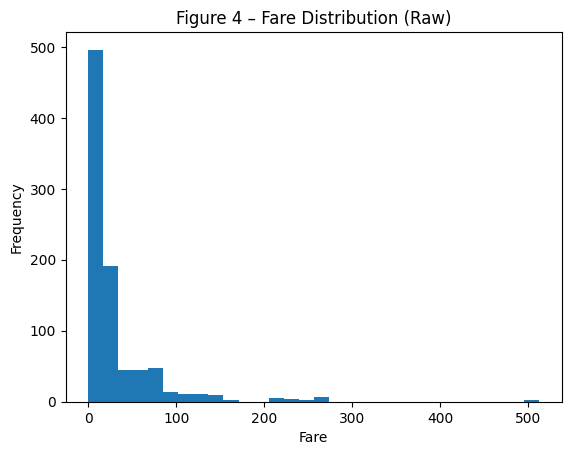

In [9]:
plt.figure()
clean_df["Fare"].dropna().plot(kind="hist", bins=30)
plt.title("Figure 4 – Fare Distribution (Raw)")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


**Figure 4 & 5 Interpretation:**  
The raw fare distribution is highly skewed. After applying logarithmic transformation, the fare distribution becomes more normalized, which benefits machine learning models.


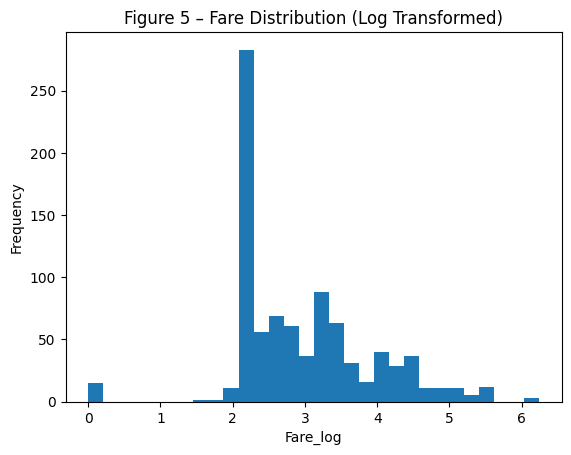

In [10]:
clean_df["Fare_log"] = np.log1p(clean_df["Fare"])

plt.figure()
clean_df["Fare_log"].dropna().plot(kind="hist", bins=30)
plt.title("Figure 5 – Fare Distribution (Log Transformed)")
plt.xlabel("Fare_log")
plt.ylabel("Frequency")
plt.show()


**Figure 4 & 5 Interpretation:**  
The raw fare distribution is highly skewed. After applying logarithmic transformation, the fare distribution becomes more normalized, which benefits machine learning models.


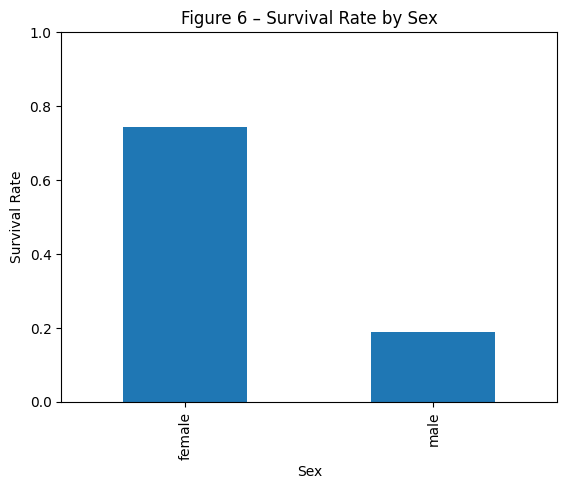

In [11]:
survival_by_sex = clean_df.groupby("Sex")["Survived"].mean()

plt.figure()
survival_by_sex.plot(kind="bar")
plt.title("Figure 6 – Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()


**Figure 6 Interpretation:**  
Female passengers have a significantly higher survival rate compared to male passengers, indicating that gender is an important feature.


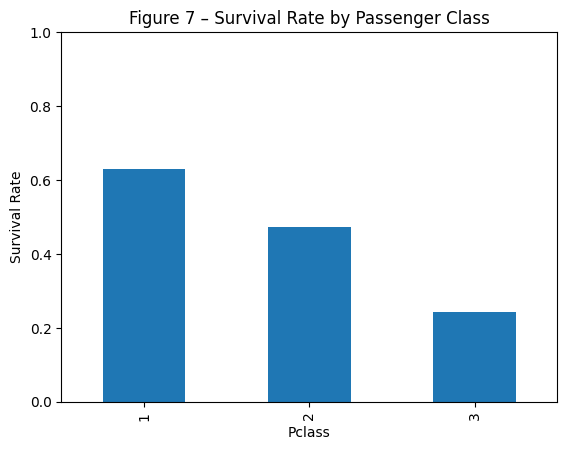

In [12]:
survival_by_class = clean_df.groupby("Pclass")["Survived"].mean()

plt.figure()
survival_by_class.plot(kind="bar")
plt.title("Figure 7 – Survival Rate by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()


**Figure 7 Interpretation:**  
Passengers in higher classes (Pclass = 1) had a greater chance of survival, while third-class passengers had the lowest survival rate.


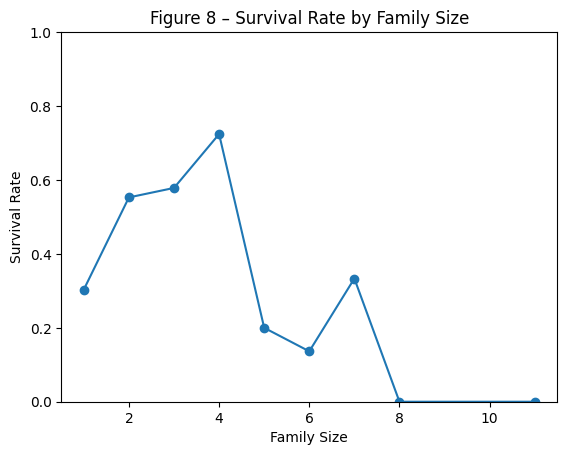

In [13]:
clean_df["FamilySize"] = clean_df["SibSp"] + clean_df["Parch"] + 1

survival_by_family = clean_df.groupby("FamilySize")["Survived"].mean()

plt.figure()
survival_by_family.plot(kind="line", marker="o")
plt.title("Figure 8 – Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()


**Figure 8 Interpretation:**  
Survival probability varies with family size. Passengers traveling with small families had higher survival rates compared to those traveling alone or with very large families.


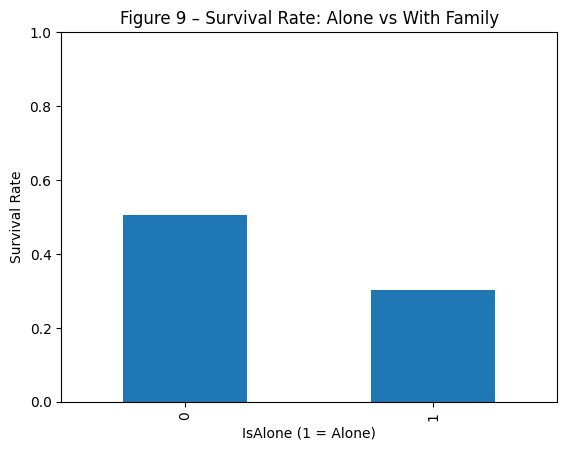

In [14]:
clean_df["IsAlone"] = (clean_df["FamilySize"] == 1).astype(int)

survival_alone = clean_df.groupby("IsAlone")["Survived"].mean()

plt.figure()
survival_alone.plot(kind="bar")
plt.title("Figure 9 – Survival Rate: Alone vs With Family")
plt.xlabel("IsAlone (1 = Alone)")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()


**Figure 9 Interpretation:**  
Passengers who were not traveling alone had a higher survival rate, suggesting that family presence positively affected survival chances.


# Stage 3 – Modeling and Evaluation

In this stage, machine learning models are trained and evaluated to predict passenger survival.
Different classification algorithms are compared using evaluation metrics such as accuracy, confusion matrix, and ROC–AUC curves.

The objective of this stage is to determine the model that achieves the best predictive performance.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

import matplotlib.pyplot as plt
import numpy as np


In [16]:
target = "Survived"

X = clean_df.drop(columns=[target])
y = clean_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


In [19]:
results = {}

for name, model in models.items():
    clf = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    results[name] = {
        "model": clf,
        "y_pred": y_pred,
        "accuracy": acc
    }

    print(f"{name} Accuracy: {acc:.3f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.799
Decision Tree Accuracy: 0.749
Random Forest Accuracy: 0.816


## Confusion Matrix Analysis

The confusion matrix provides a detailed breakdown of correct and incorrect predictions made by each model.
It helps evaluate how well the models distinguish between survived and non-survived passengers.


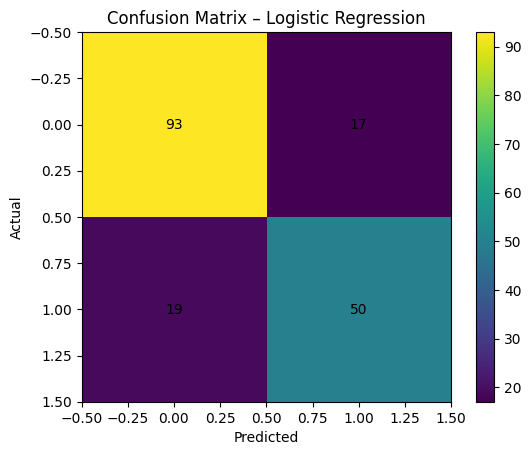

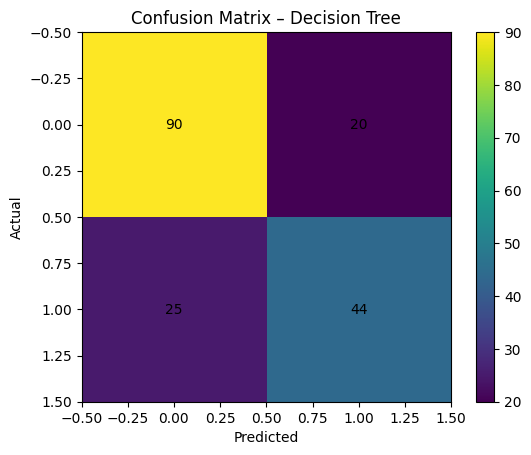

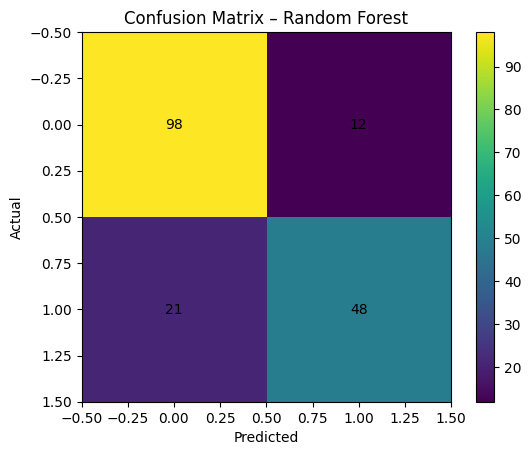

In [20]:
for name, res in results.items():
    cm = confusion_matrix(y_test, res["y_pred"])

    plt.figure()
    plt.imshow(cm)
    plt.title(f"Confusion Matrix – {name}")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.show()


## ROC Curve and AUC Analysis

ROC curves are used to evaluate the classification performance of the models across different thresholds.
The Area Under the Curve (AUC) metric summarizes the overall ability of each model to distinguish between classes.


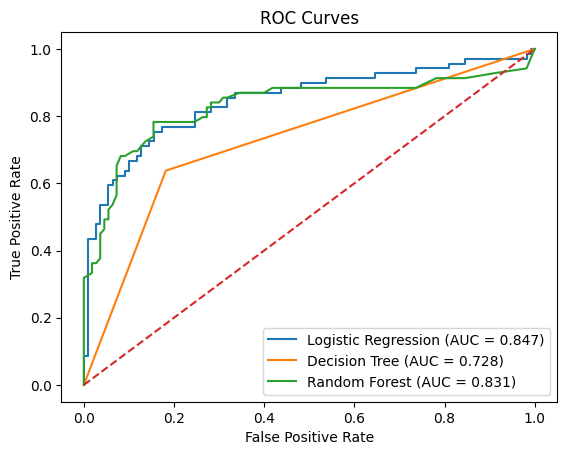

In [21]:
plt.figure()

for name, res in results.items():
    model = res["model"]
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


## Model Comparison and Final Evaluation

Among the evaluated models, the Random Forest and Logistic Regression models achieved the highest performance.
ROC–AUC analysis confirms that these models provide better class separation compared to the Decision Tree model.

Based on the evaluation results, the model with the highest overall performance is selected as the final model.
